In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
from obspy import read, Trace, Stream
import numpy as np
import pandas as pd
import os, glob
from pyrocko import io, trace
from pyrocko.obspy_compat import to_obspy_trace
import progressbar
from nptdms import TdmsFile
import warnings
warnings.filterwarnings('ignore')

In [3]:
import mpld3
mpld3.enable_notebook()
%matplotlib inline

# 2017 Chiapas earthquake

<img src="mexico.png" alt="" />

UTC time 2017-09-08 04:49:19 \
Local time 2017-09-08 23:49:21 CDT \
FOSSA time 2017-09-08 21:49:21 PST

### The recorded data are plotted as strain-rate after multiplying by the gauge length (10 m) to convert to units proportional to velocity (1e-6 m/s), and have been averaged over 100 m of linear fiber length (50 traces) and then bandpass filtered 0.01–0.1 Hz.

# Plot Cable

<img src="fiber.png" alt="" />

In [4]:
cable_coors = pd.read_csv('DASchanmap_westsac_2017.csv', skiprows=[0])

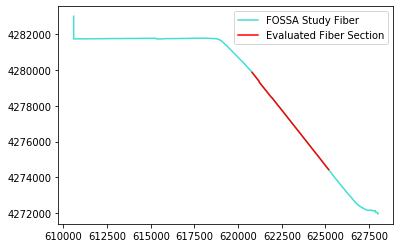

In [20]:
corrmin = 2000
corrmax = 5500
plt.plot(cable_coors.easting, cable_coors.northing,c='turquoise',label='FOSSA Study Fiber')
plt.plot(cable_coors.easting[corrmin:corrmax], cable_coors.northing[corrmin:corrmax],c='r',label='Evaluated Fiber Section')
plt.legend()

In [6]:
DIR = os.getcwd()
# tdmss = sorted(glob.glob(os.path.join(DIR,'Data/*170907235*')))
tdmss = sorted(glob.glob(os.path.join(DIR,'Data/*17090800*')))

In [18]:
tdmss[:5]

['/media/dertuncay/Elements3/DAS/PubDAS/FOSSA/Data/westSac_170908000029.tdms',
 '/media/dertuncay/Elements3/DAS/PubDAS/FOSSA/Data/westSac_170908000129.tdms',
 '/media/dertuncay/Elements3/DAS/PubDAS/FOSSA/Data/westSac_170908000229.tdms',
 '/media/dertuncay/Elements3/DAS/PubDAS/FOSSA/Data/westSac_170908000329.tdms',
 '/media/dertuncay/Elements3/DAS/PubDAS/FOSSA/Data/westSac_170908000429.tdms']

In [21]:
obs_traces = []
new_stream = Stream()
for i, tdms in progressbar.progressbar(enumerate(tdmss[:15])):
    traces = io.load(tdms, format='tdms_idas')
    if i == 0:
        print('Number of channels in the file: {}'.format(len(traces)))
    obs_trace = to_obspy_trace(traces[3000])
    obs_trace.resample(50)
    new_stream += obs_trace

- |               #                                   | 1 Elapsed Time: 0:00:01

Number of channels in the file: 11648


| |                                          #       | 14 Elapsed Time: 0:01:24


In [9]:
new_stream.merge()

1 Trace(s) in Stream:
DA.03000.. | 2017-09-07T22:00:29.363612Z - 2017-09-07T22:15:29.361612Z | 500.0 Hz, 450000 samples

In [10]:
new_stream[0].stats

         network: DA
         station: 03000
        location: 
         channel: 
       starttime: 2017-09-07T22:00:29.363612Z
         endtime: 2017-09-07T22:15:29.361612Z
   sampling_rate: 500.0
           delta: 0.002
            npts: 450000
           calib: 1.0

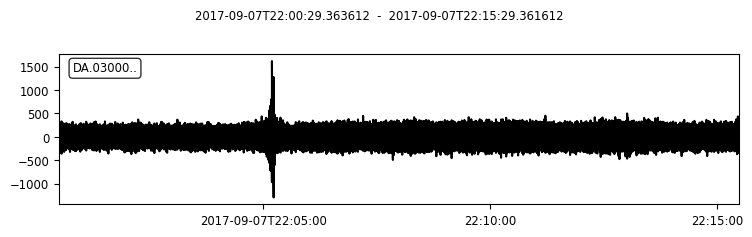

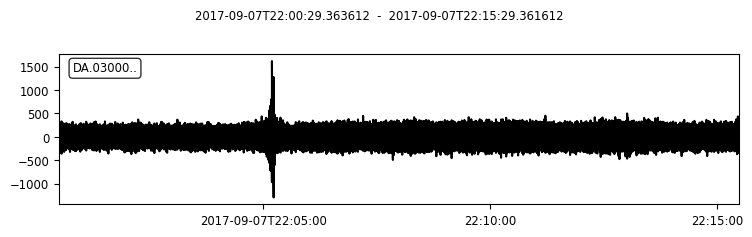

In [11]:
new_stream.plot()

In [12]:
new_stream.filter('bandpass',freqmin=0.01,freqmax=0.1)

1 Trace(s) in Stream:
DA.03000.. | 2017-09-07T22:00:29.363612Z - 2017-09-07T22:15:29.361612Z | 500.0 Hz, 450000 samples

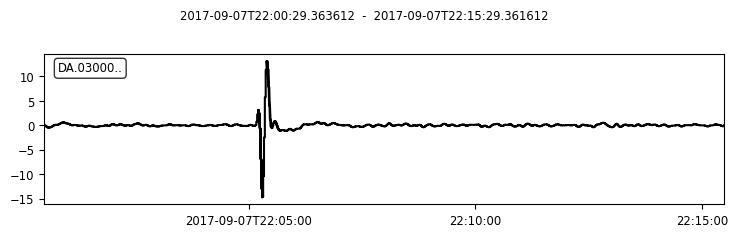

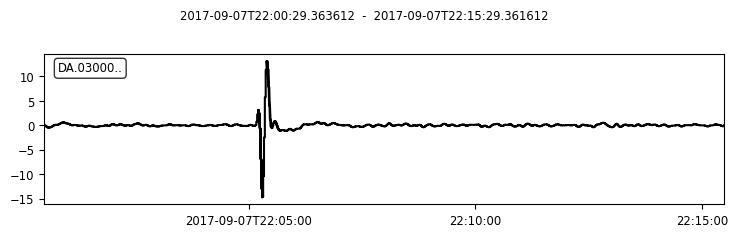

In [13]:
new_stream.plot()

## Read Data with npTDMS

In [14]:
single_channel = []
for j,tdms in progressbar.progressbar(enumerate(tdmss[:2])):
    tdms_file = TdmsFile.read(tdms)
    if j == 0:
        print(tdms_file.properties)
    ## Convert Data to Pandas DataFrame
    tdms_file_df = tdms_file.as_dataframe()
    new_column_names = []
    for index, column in enumerate(tdms_file_df.columns):
        new_column_names.append(column.replace(column,'Channel{}'.format(index)))
    tdms_file_df.columns = new_column_names
    if j == 0:
        print(tdms_file_df)
    single_channel.append(tdms_file_df.Channel3000.values.tolist())

/ |#                                                  | 0 Elapsed Time: 0:00:00[nptdms.tdms_segment WARNING] Data size 698880000 is not a multiple of the chunk size 1048320. Will attempt to read last chunk


OrderedDict([('name', 'westSac_170908000029'), ('SamplingFrequency[Hz]', 500.0), ('SpatialResolution[m]', 2.0), ('StartPosition[m]', 270), ('MeasureLength[m]', 23296), ('StreamTime[s]', inf), ('Continuous Mode', True), ('Source Mode', 'Normal'), ('Power Decrement', 0.0), ('PeakVoltage[V]', 2.0), ('Pulse 2 Delay (ns)', 500.0), ('PulseWidth[ns]', 50.0), ('OffsetLength', 64.0), ('PreTrigSamples', 94), ('Reference length (m)', 10.0), ('SavingBandwidth (MB/s)', 350.0), ('Reference Level 1', 65535), ('Reference Level 2', 56640), ('Reference Level 3', 56172), ('FibreIndex', 1.4682), ('Fibre Length Multiplier', 1.0209523838714072), ('UserZeroRef', 0.0), ('Unit Calibration (nm)', 116.0), ('Diff Amplify Factor', 0), ('Attenuator Voltage (V)', 2.290419), ('Fibre Length per Metre', 1.0), ('Zero Offset (m)', -116.89900208064297), ('Receiver Gain', '165.00\t165.00\t165.00\r\n'), ('Time Decimation', 1), ('OutputDecimation[bool]', 1), ('P', 5), ('P Coefficients', '1.00\t1.00\t1.00\t1.00\t1.00\r\n'), (

- |                                      #            | 1 Elapsed Time: 0:00:14[nptdms.tdms_segment WARNING] Data size 698880000 is not a multiple of the chunk size 1048320. Will attempt to read last chunk


       Channel0  Channel1  Channel2  Channel3  Channel4  Channel5  Channel6  \
0          -798      1512      1162      -418      -283      -217      -146   
1          4583      3169       728      -386      -214        13        30   
2          1716      -408      -581       397       455       263       155   
3         -4774     -1547       229      -122      -353      -316      -271   
4          3779      1386      1551       376       349        95        90   
...         ...       ...       ...       ...       ...       ...       ...   
29995     -1665     -1986     -1705       340         8        35        22   
29996       516      -480     -1576      -398      -239      -306      -147   
29997     -1401     -3021     -1356       508       179       381       303   
29998       308      -479       104      -399       110        55        19   
29999     -1320     -1153      -799      -359        56       -17       -11   

       Channel7  Channel8  Channel9  ...  Channel11

| |                  #                                | 1 Elapsed Time: 0:00:28


In [15]:
single_channel_np = np.array(single_channel)
print(single_channel_np.shape)

(2, 30000)


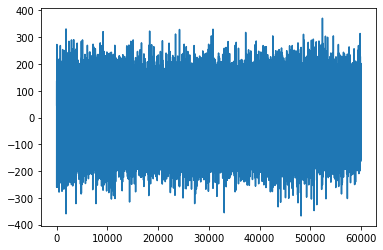

In [16]:
plt.plot(single_channel_np.flatten())